In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

## Goodness-of-fit test - The discrete case

In [2]:
# copy-paste the data
s = '1 1 3 2 3 1 1 1 4 3 2 7 1 2 1 1 2 4 2 1 1 1 2 2 5 2 1 1 1 1 3 2 2 1 1 1 1 1 6 1 3 1 1 3 2 1 1 2 1 4' # s is a string
L = s.split(' ') # we cut s into a list of strings by using the space ' ' as a separator 

L = list(map(int,L)) # we use map to transfer each string into an integer (for a real number use float instead of int) 
                        # and we make a list of it

x= np.array(L) # we transorm this list into an array

n = len(x)
x, n

(array([1, 1, 3, 2, 3, 1, 1, 1, 4, 3, 2, 7, 1, 2, 1, 1, 2, 4, 2, 1, 1, 1,
        2, 2, 5, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 6, 1, 3, 1, 1, 3,
        2, 1, 1, 2, 1, 4]),
 50)

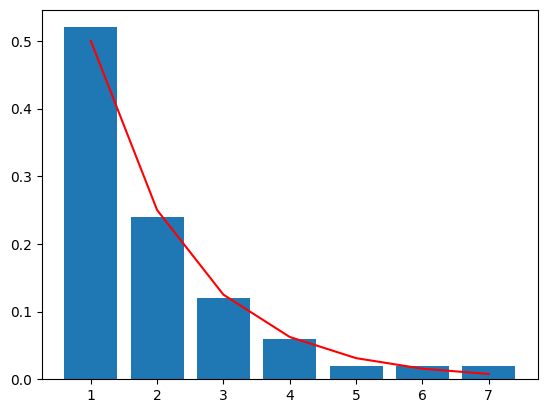

In [3]:
val, freq = np.unique(x, return_counts=True)
plt.bar(val, freq / n)
pj = np.array([1/2**k for k in range(1,8)])
plt.plot(val, pj, 'r-')
plt.show()

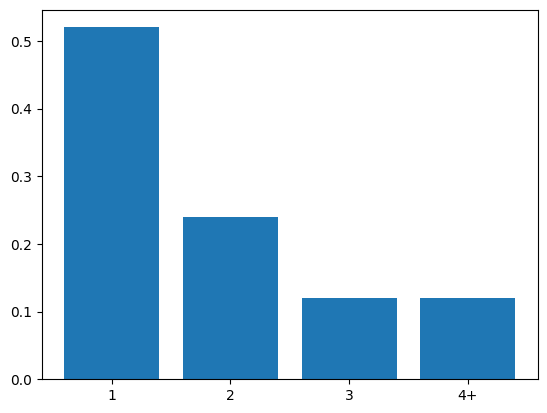

In [4]:
val_new = np.hstack((val[:-4], np.array(['4+'])))
nj = np.hstack((freq[:-4], np.sum(freq[-4:])))
plt.bar(val_new, nj / n)
pj_new_arr = [1/2**k for k in range(1,4)]
pj_new = np.array(pj_new_arr + [1 - sum(pj_new_arr)])
plt.show()

In [5]:
d_sq = sum((nj - n * pj_new)**2 / (n * pj_new))
J = len(nj)
d_sq # Chi-squared distance d**2
# Significance risk-level = 0.05
p_value = st.chi2.sf(d_sq, df = J - 1)
alpha = 0.05
p_value

np.float64(0.9941243682104942)

In [6]:
xc = st.chi2.ppf(1 - alpha, J - 1)
xc

np.float64(7.814727903251179)

Conclusion: We DO NOT REJECT H0

## Chi-squared test for comparing homogeneous samples

## Goodness-of-fit test - The continuous case

We use the data `flights.txt`

In [7]:
sr = pd.read_csv('flights.txt') # open the data file as a series (a 1D DataFrame)
sr

FileNotFoundError: [Errno 2] No such file or directory: 'flights.txt'

In [ ]:
x = np.array(sr.flights)
n = len(x)
x, n

(array([1.90983291, 1.90466853, 1.91536834, 1.92280288, 1.90508347,
        1.94976949, 1.91660464, 1.91486734, 1.90310226, 1.9149122 ,
        1.90231756, 1.92527141, 1.93807129, 1.9315535 , 1.90449458,
        1.90404312, 1.93886203, 1.94525674, 1.9266886 , 1.95545771,
        1.99129044, 1.96690489, 1.96469865, 1.98731567, 1.95051683,
        1.95242237, 1.98339581, 1.9801734 , 1.97630512, 1.98648547,
        1.98536267, 1.98906885, 1.96439885, 1.9846266 , 1.97783349,
        1.96982604, 1.95307953, 1.98900878, 2.01687919, 2.0303933 ,
        2.0370627 , 2.00524066, 2.00639442, 2.02747701, 2.02426147,
        2.04452378, 2.03994801, 2.03671705, 2.00256659, 2.00364426,
        2.00442637, 2.03991754, 2.04715041, 2.03418578, 2.00660415,
        2.03613623, 2.00551767, 2.00587464, 2.0320359 , 2.01644071,
        2.0326906 , 2.03745657, 2.02915929, 2.03700162, 2.01174135,
        2.03674788, 2.04852993, 2.04334651, 2.00431173, 2.01832183,
        2.01845994, 2.03425142, 2.02989708, 2.03